In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## Data Cleaning
- Converting data type of rate

In [27]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [31]:
df.isna().any()

name                           False
online_order                   False
book_table                     False
rate                           False
votes                          False
approx_cost(for two people)    False
listed_in(type)                False
dtype: bool

In [34]:
df.duplicated().any()

np.False_

In [36]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

Text(0.5, 0, 'Type of Restaurents')

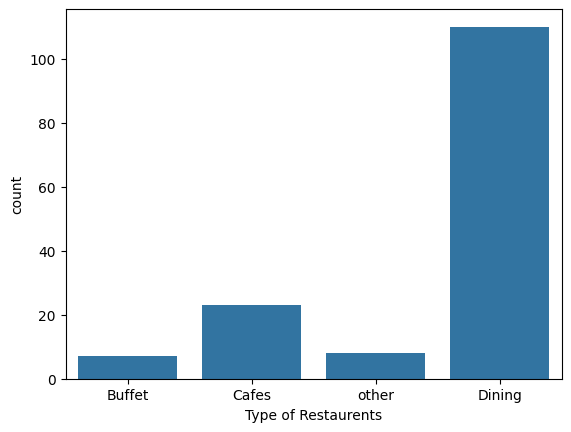

In [40]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurents')

Text(0, 0.5, 'Votes')

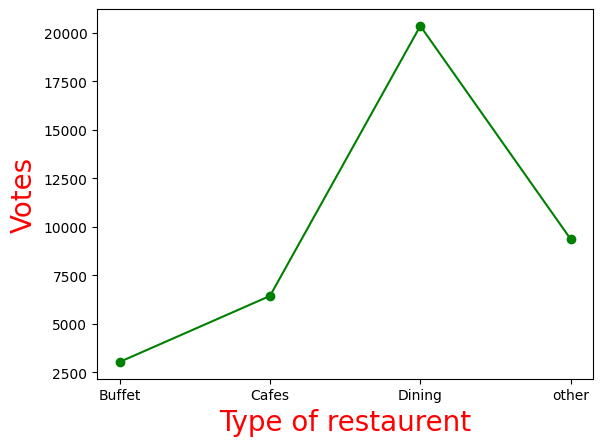

In [47]:
grouped = df.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped, marker = 'o', c='green')
plt.xlabel('Type of restaurent', c = 'red' , size=20)
plt.ylabel('Votes', c = 'red' , size=20)

<function matplotlib.pyplot.show(close=None, block=None)>

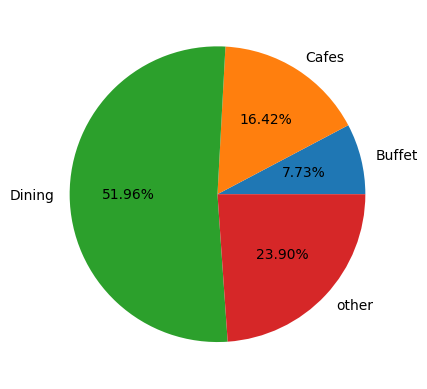

In [56]:
plt.pie(grouped, autopct = '%1.2f%%', labels=grouped.index)
plt.show

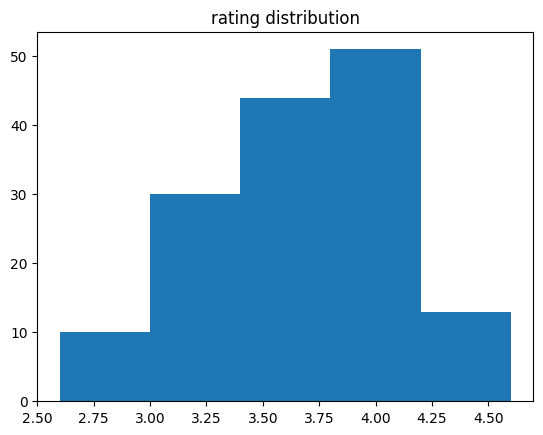

In [60]:
plt.hist(df['rate'], bins = 5)
plt.title('rating distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

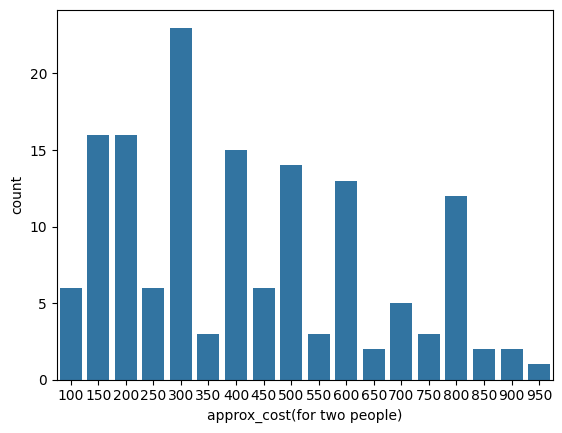

In [62]:
sns.countplot(x = df['approx_cost(for two people)'])